# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [9]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from pprint import pprint
import requests
import json
import matplotlib.pyplot as plt

In [4]:
def global_power():
  # IMPORT FILES
    generation_path = "data/global-power-plants/global_power_plant_database.csv"
    emission_path = "data/global-power-plants/global_power_emissions_database.xlsx"
  
  # power generation csv
    with open(generation_path, encoding='utf8') as fin:
        ppg = pd.read_csv(fin, low_memory=False)

  # power plant emissions xlsx
    ppe = pd.read_excel(emission_path, sheet_name='GPED_v1.0_Plant Level', skiprows=0, header=1)

  # removing unwanted data
    unwanted_columns = ['latitude',
                      'longitude',
                      'other_fuel1',
                      'other_fuel2',
                      'other_fuel3',
                      'commissioning_year',
                      'gppd_idnr',
                      'owner',
                      'source',
                      'url',
                      'geolocation_source',
                      'wepp_id',
                      'year_of_capacity_data',
                      'generation_data_source',
                      'generation_gwh_2018',
                      'generation_gwh_2019',
                      'estimated_generation_note_2013',
                      'estimated_generation_note_2014',
                      'estimated_generation_note_2015',
                      'estimated_generation_note_2016',
                      'estimated_generation_note_2017']
    ppg.drop(unwanted_columns, axis=1, inplace=True)

    unwanted_columns = ['No.', 'Number of Units', 'Total Plant Installed Capacity (MW)']
    ppe.drop(unwanted_columns, axis=1, inplace=True)

  # AGGREGATING DATA
    avgs = ['generation_gwh_2013',
          'generation_gwh_2014',
          'generation_gwh_2015',
          'generation_gwh_2016',
          'generation_gwh_2017']
    ppg['AVG_GENERATION'] = ppg[avgs].mean(axis=1)

    avgs = ['estimated_generation_gwh_2013',
          'estimated_generation_gwh_2014',
          'estimated_generation_gwh_2015',
          'estimated_generation_gwh_2016',
          'estimated_generation_gwh_2017']
    ppg['AVG_EST_GENERATION'] = ppg[avgs].mean(axis=1)

  # merge the two average columns into a single column
    ppg['GENERATION_MW'] = ppg.apply(lambda x : np.fmax(x['AVG_GENERATION'], x['AVG_EST_GENERATION']), axis=1)

  # remove unaggregated columns
    unwanted_columns = ['AVG_GENERATION',
                      'AVG_EST_GENERATION',
                      'generation_gwh_2013',
                      'generation_gwh_2014',
                      'generation_gwh_2015',
                      'generation_gwh_2016',
                      'generation_gwh_2017',
                      'estimated_generation_gwh_2013',
                      'estimated_generation_gwh_2014',
                      'estimated_generation_gwh_2015',
                      'estimated_generation_gwh_2016',
                      'estimated_generation_gwh_2017']
    ppg.drop(unwanted_columns, axis=1, inplace=True)

  # merge rows by fuel type
    generation_dist = ppg.groupby('primary_fuel')['GENERATION_MW'].sum().sort_values(ascending=False)
    emission_dist = ppe.groupby('Fuel Types').aggregate({'CO2 Emissions (Mg)':'sum',
                                                       'SO2 Emissions (Mg)':'sum',
                                                       'NOx Emissions (Mg)':'sum',
                                                       'PM2.5 Emissions (Mg)':'sum'})

  # COMBINING TABLES
    generation_dist.index = generation_dist.index.str.upper()
    generation_dist.drop('WAVE AND TIDAL', axis=0, inplace=True)
    gen_other = ['PETCOKE','WASTE','COGENERATION','STORAGE','NUCLEAR']
    generation_dist['OTHER'] = generation_dist[gen_other].sum(axis=0)
    generation_dist.drop(gen_other, axis=0, inplace=True)
    emission_dist = emission_dist.rename(index={'NG':'GAS'})

    power = pd.concat([generation_dist, emission_dist], axis=1)
    power = power.fillna(0)

    return power

############ Function Call ############
global_power()






,GENERATION_MW,CO2 Emissions (Mg),SO2 Emissions (Mg),NOx Emissions (Mg),PM2.5 Emissions (Mg)
COAL,9.960694e+06,8.880799e+09,2.973419e+07,1.848038e+07,2.508320e+06
GAS,6.304916e+06,2.518846e+09,5.228739e+04,3.440040e+06,4.144760e+04
HYDRO,3.755360e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
WIND,7.094421e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
OIL,5.360917e+05,7.370139e+08,8.689335e+06,2.723445e+06,9.304416e+04
SOLAR,3.486002e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
GEOTHERMAL,6.083382e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
BIOMASS,3.368912e+04,1.196067e+08,1.792376e+05,1.744930e+05,3.713316e+04
OTHER,3.011469e+06,2.749785e+08,1.500827e+05,3.382073e+05,1.042250e+04


## Web Collection Requirement \#1


In [4]:
def web_scrape(): 

    #creates a dict that connects to a list of all the HashRates of GPUs for easy iteration when creating visuals
    hashlist = []
    hashdict = {}
    finalhash = []
    url = requests.get('https://whattomine.com/gpus')
    soup = BeautifulSoup(url.text, 'html.parser')
    for hasher in soup.find_all('div',{'class' :'position-relative'}):
        for h in hasher.stripped_strings:
            hashlist.append(h)
            hashlist2=  hashlist[::2]
            hashdict['Hashrate(Millions of Hash Per Sec)'] = [z for z in hashlist2] 
            finalhash = [float(x[:-5]) for x in hashlist2]
    #return finalhash

            
    wattlist = []
    wattdict = {}
    for wat in soup.find_all('small',{'class':'text-muted position-absolute'}):
        for w in wat.stripped_strings:
            wattlist.append(int(w[-4:-1]))
    #return wattlist
            wattdict["Watt"] = [z for z in wattlist]
    
    #creates a dict that connects to a list of all the Revenues of GPUs for easy iteration when creating visuals
    revlist = []
    revdict = {}
    for rev in soup.find_all('td',{'class':'text-right table-success font-weight-bold'}):
        for r in rev.stripped_strings:
            revlist.append(r)
            revdict["24Hour Revenue"] = [z for z in revlist]
    
    #creates a dict that connects to a list of all the Names of GPUs
    namelist = []
    namedict = {}
    for name in soup.find_all('td'):
        for n in name.stripped_strings:
            namelist.append(n)
            if '(*)' in namelist:
                namelist.remove('(*)')
            namelist2 = namelist[1:650:16]
            namedict["GPU Model"] = [z for z in namelist2]

    # this dictionary matches GPU model to the hash rate and 24 hour revenue
    fulldict = {}
    for i in range(len(namelist2)):
        fulldict[namelist2[i]] = {"Hashrate(Millions of Hash Per Sec)":hashlist2[i],"24Hour Revenue": revlist[i]}
    
    #creates a data frame with the columns as GPU name and the index as the description 
    data = []
    data.append(finalhash)
    data.append(revlist)
    data.append(wattlist)
    df = pd.DataFrame(data, index= ['Hashrate','24 Hour Revenue','Watts'], columns = namelist2).T
    return df 

############ Function Call ############
web_scrape()


,Hashrate,24 Hour Revenue,Watts
GeForce RTX 3090,114,$8.29,320
Radeon VII,93,$6.91,200
GeForce RTX 3080,91.5,$6.71,230
Radeon RX 6800,64,$4.72,150
Radeon RX 6900 XT,64,$4.72,150
Radeon RX 6800 XT,64,$4.72,150
GeForce RTX 3080 Ti,4.2,$4.61,280
GeForce RTX 3060 Ti,58.1,$4.30,130
GeForce RTX 3070,58.1,$4.30,130
Radeon RX 5700 XT,55,$4.06,130


## Web Collection Requirement #2

In [86]:
#data with details on specific crypto - to utilize when visualizing 
def coin_info():
    url = requests.get('https://whattomine.com/coins.json')
    j = url.json()
    df = pd.DataFrame(j['coins'])
    coins = pd.Series(j['coins'].keys)
    df.rename(index=coins, inplace=True)
    return df.transpose()

############ Function Call ############
coin_info()

,id,tag,algorithm,block_time,block_reward,block_reward24,last_block,difficulty,difficulty24,nethash,...,exchange_rate_curr,market_cap,estimated_rewards,estimated_rewards24,btc_revenue,btc_revenue24,profitability,profitability24,lagging,timestamp
Ethereum,151,ETH,Ethash,13.827,2.36378,2.44943,12908200,6.93558e+15,7.17539e+15,501597158435896,...,BTC,"$269,931,056,280.33",0.00265,0.00265,0.00015955,0.00015981,100,100,False,1627390806
Nicehash-Ethash,15,NICEHASH,Ethash,1,1,1,0,1,1,38595457117615,...,BTC,$0.00,0.00019,0.00015,0.0001914,0.00015111,120,95,False,1627390808
Ravencoin,234,RVN,KawPow,59.0,5000,5000,1859476,52768.1,52607.7,3841310060609,...,BTC,"$567,126,275.73",74.33829,74.56497,0.0001182,0.00011856,74,74,False,1627390691
EthereumClassic,162,ETC,Etchash,13.3878,3.104,3.104,13212034,2.85568e+14,2.89878e+14,21330436044980,...,BTC,"$6,444,343,824.22",0.08452,0.08326,0.00011023,0.00010859,69,68,False,1627390821
Nicehash-KawPow,45,NICEHASH,KawPow,1,1,1,0,1,1,1307809638879,...,BTC,$0.00,0.00011,0.00011,0.00010959,0.00010715,69,67,False,1627390806
Ergo,340,ERG,Autolykos,109.0,67.51,67.5101,541349,1.41051e+15,1.40477e+15,12940460639260,...,BTC,"$169,249,359.05",0.73195,0.73494,0.00010086,0.00010127,63,63,False,1627390737
Nicehash-Autolykos,48,NICEHASH,Autolykos,1,1,1,0,1,1,548460964031,...,BTC,$0.00,0.00009,0.0001,0.00009489,0.00009859,59,62,False,1627390807
Beam,294,BEAM,BeamHashIII,60.0,40,40,1342985,2.21491e+07,2.27971e+07,369151,...,BTC,"$44,200,622.84",6.89191,6.69605,0.00008525,0.00008283,53,52,False,1627390838
Nicehash-BeamV3,38,NICEHASH,BeamHashIII,1,1,1,0,1,1,202075,...,BTC,$0.00,0.00009,0.00008,0.00008701,0.00008178,55,51,False,1627390807
Vertcoin,5,VTC,Verthash,155.0,25,25,1602775,93.3106,99.8424,2585586021,...,BTC,"$30,084,049.85",6.75521,6.31349,0.00008674,0.00008107,54,51,False,1627390698


## Additional Data Sets

In [5]:
def hash_history():
    path = "data/blockchain-dot-com-hash-rate.json"
    hashes = pd.read_csv(path)
    return hashes
hash_history()

,Timestamp,hash-rate
0,2020-07-15 00:00:00,1.189935e+08
1,2020-07-16 00:00:00,1.172690e+08
2,2020-07-17 00:00:00,1.017481e+08
3,2020-07-18 00:00:00,1.120953e+08
4,2020-07-19 00:00:00,1.129576e+08
...,...,...
360,2021-07-10 00:00:00,1.149524e+08
361,2021-07-11 00:00:00,8.924873e+07
362,2021-07-12 00:00:00,8.996272e+07
363,2021-07-13 00:00:00,9.710262e+07


#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. 

2. 

3. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source:global_power_plant_database.csv
*   Web Collection #1 Source:https://whattomine.com/gpus
*   Web Collection #2 Source:https://whattomine.com/coins.json



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Insights

In [118]:
def insight1():
    df = web_scrape()
    avgwat = df['Watts'].sum()/len(df['Watts'])
    avghash = df['Hashrate'].sum()/len(df['Hashrate'])
    hash_pow = avgwat/((avghash*1000000) - 34599965.4) #how many watts it takes to produce a singular hash
    return hash_pow





############ Function Call ############
insight1()

1.0601693848705725e-05

### Insight 1 Explanation

First, a sum of all the wattages and hashrates (in millions of hashes) for each of the most popular/most used GPU was found and then divided by the length of the data in the column. With these averages we can figure out how much cryptocurrency can be hashed using a watt of power. The average hash variable had to be multiplied by one million to account for the ratio of the data. Not all GPUs measured their hashes in millions though. Some were simply measured in hash per second. To account for this, the extra amount of hashes created by the multiplication of 1 million was removed and the singular hashes were added in. This returned an accurate result of 94324.55 which represents how the hashrate per one unit of power (watts). This information can further be used with other data we have accumulated.

In [119]:
def insight2():
    hash_pow = insight1()
    df = hash_history()
    hashrate = df['hash-rate'].sum()/len(df['hash-rate'])
    hashpd = hashrate*hash_pow
    return hashpd
    
    





############ Function Call ############
insight2()

1473.570749077386

### Insight 2 Explanation
This data takes the hashrate over the course of a day and divides it by the amount of days in question. This results in an average hashrate over the course of a day. Using the amount of wattage it takes to produce a singular hash, we can multiply the two to see how many watts of power will be used per day. This can them be factored into later visualizations and compared to emissions.

In [150]:
def get_emissions():
    df = global_power()
    hash_pow = insight1()
    emissions = df.iloc[:,1:].sum()
    generator = df.iloc[:,1].sum()
    volume = hash_pow/(generator/emissions)
    return volume
get_emissions()





############ Function Call ############
#insight3()

CO2 Emissions (Mg)      1.058742e-05
SO2 Emissions (Mg)      3.278574e-08
NOx Emissions (Mg)      2.125432e-08
PM2.5 Emissions (Mg)    2.273042e-09
dtype: float64

### Insight 3 Explanation

Insert explanation here

In [ ]:
def insight4():
  pass





############ Function Call ############
insight4()

### Insight 4 Explanation

Insert explanation here

In [ ]:
def insight5():
  pass





############ Function Call ############
insight5()

### Insight 5 Explanation

Insert explanation here

## Data Visualizations

In [ ]:
def visual1():
  pass





############ Function Call ############
visual1()

### Visualization 1 Explanation

Insert explanation here

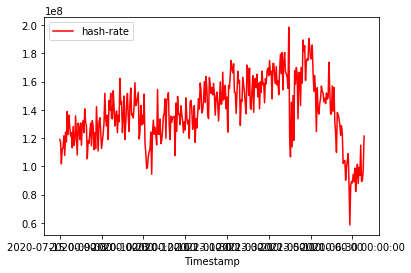

In [24]:
def visual2():
    df = hash_history()
    df.plot(x= 'Timestamp',y = 'hash-rate', color = 'red')

   





############ Function Call ############
visual2()

### Visualization 2 Explanation

Insert explanation here

In [ ]:
def visual3():
  pass





############ Function Call ############
visual3()

### Visualization 3 Explanation

Insert explanation here

## Summary Files

In [ ]:
def summary1():
  pass





############ Function Call ############
summary1()

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Example Module Documentation
*   Example Stack Overflow Assistance



# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Link


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
